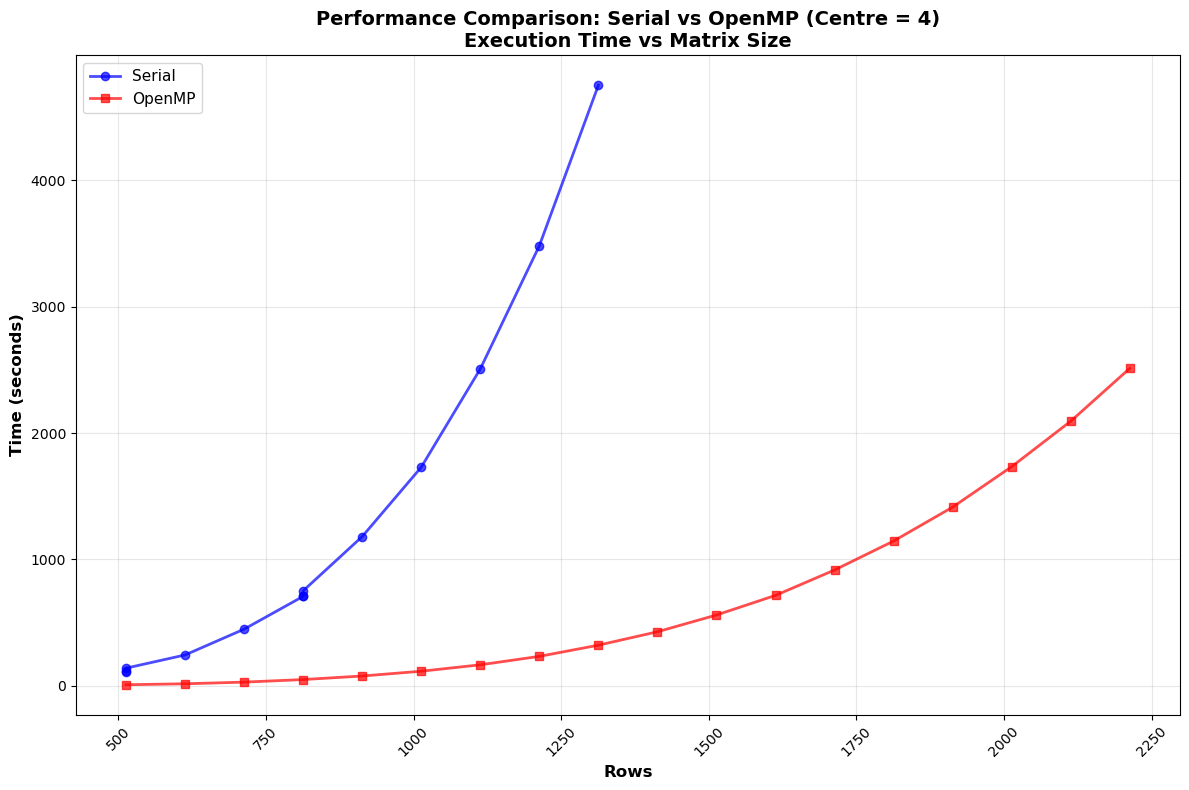

Data Summary:

Serial:
  Number of data points: 13
  Average time: 1298.62 seconds
  Min time: 113.11 seconds
  Max time: 4751.12 seconds
  Matrix size range: 513 to 1313 rows

OpenMP:
  Number of data points: 18
  Average time: 696.83 seconds
  Min time: 8.91 seconds
  Max time: 2512.27 seconds
  Matrix size range: 513 to 2213 rows


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('results.csv', delimiter=';')

# Clean the data - fix the typo "OpemMP" to "OpenMP"
df['Method'] = df['Method'].replace('OpemMP', 'OpenMP')

# Filter data to only include rows where Centre = 4
df = df[df['Centre'] == 4]

# Create the plot
plt.figure(figsize=(12, 8))

# Get unique methods
methods = df['Method'].unique()
colors = ['blue', 'red']  # Different colors for each method
markers = ['o', 's']      # Different markers for each method

# Plot each method separately
for i, method in enumerate(methods):
    method_data = df[df['Method'] == method]
    
    # Sort by Rows for better line visualization
    method_data = method_data.sort_values('Rows')
    
    plt.plot(method_data['Rows'].values, method_data['Time'].values, 
             label=method, 
             color=colors[i], 
             marker=markers[i], 
             markersize=6,
             linewidth=2,
             alpha=0.7)

# Customize the plot
plt.xlabel('Rows', fontsize=12, fontweight='bold')
plt.ylabel('Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Performance Comparison: Serial vs OpenMP (Centre = 4)\nExecution Time vs Matrix Size', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# Set axis formatting
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print some basic statistics
print("Data Summary:")
print("="*50)
for method in methods:
    method_data = df[df['Method'] == method]
    print(f"\n{method}:")
    print(f"  Number of data points: {len(method_data)}")
    print(f"  Average time: {method_data['Time'].mean():.2f} seconds")
    print(f"  Min time: {method_data['Time'].min():.2f} seconds")
    print(f"  Max time: {method_data['Time'].max():.2f} seconds")
    print(f"  Matrix size range: {method_data['Rows'].min()} to {method_data['Rows'].max()} rows")